In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [173]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [174]:
null_values = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)).reset_index()
null_values.columns = ['column_name','values']
percent = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)/len(df_train)*100).reset_index()
percent.columns = ['column_name','percent']
percent_1 = pd.DataFrame(percent.loc[:,'percent'])

null_df = pd.concat([null_values,percent_1],axis = 1)
null_df

,column_name,values,percent
0,Credit_History,50,8.143322
1,Self_Employed,32,5.211726
2,LoanAmount,22,3.583062
3,Dependents,15,2.442997
4,Loan_Amount_Term,14,2.280130
5,Gender,13,2.117264
6,Married,3,0.488599
7,Loan_Status,0,0.000000
8,Property_Area,0,0.000000
9,CoapplicantIncome,0,0.000000


In [175]:

df_train['Self_Employed'] = df_train['Self_Employed'].fillna(method = 'bfill')
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Dependents'] = df_train['Dependents'].fillna(method = 'bfill')
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(method = 'bfill')
#df_train['Gender'] = df_train['Gender'].fillna(method = 'ffill')
#df_train['Married'] = df_train['Married'].fillna(method = 'bfill')


In [176]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(method = 'bfill')

In [177]:
df_train['Gender'] = df_train['Gender'].fillna(method = 'bfill')
df_train['Married'] = df_train['Married'].fillna(method = 'bfill')

In [178]:
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
normalized_df = df_train[features]
normalized_df = normalized_df - normalized_df.mean()/normalized_df.std()


In [179]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1,'Female': 0})
df_train['Married'] = df_train['Married'].map({'Yes': 1,'No': 0})
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1,'No': 0})
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1,'N': 0})
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',60.0:'5 Years',12.0:'1 Year'})

In [180]:
df_train = df_train.replace({'Dependents':{'0':'dep_None','2':'dep_Two','1':'dep_One','3+':'dep_More_than_three'}})

In [181]:
df_train['Education'] =df_train['Education'].map({'Graduate':1,'Not Graduate':0}) 

In [182]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null object
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 62.4+ KB


In [183]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
#gen = pd.get_dummies(df_train['Gender'],drop_first = True)
dep = pd.get_dummies(df_train['Dependents'],drop_first = True)
#ed = pd.get_dummies(df_train['Education'],drop_first = True)
lat = pd.get_dummies(df_train['Loan_Amount_Term'],drop_first = True)
pa = pd.get_dummies(df_train['Property_Area'],drop_first = True)

df_train = pd.concat([df_train,dep,lat,pa],axis = 1)

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
df_train = df_train.drop(['Dependents','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)


In [186]:
df_train = pd.concat([df_train,normalized_df],axis = 1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 24 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
dep_None             614 non-null uint8
dep_One              614 non-null uint8
dep_Two              614 non-null uint8
10 Years             614 non-null uint8
15 Years             614 non-null uint8
20 Years             614 non-null uint8
25 Years             614 non-null uint8
3 Years              614 non-null uint8
30 Years             614 non-null uint8
40 Years             614 non-null uint8
5 Years              614 non-null uint8
7 Years              614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
ApplicantIncome      614 non-null float64
Coapplican

In [187]:
X = df_train.drop(['Loan_ID','Loan_Status'],axis = 1)
y = np.array(df_train['Loan_Status']).reshape(-1, 1)

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 27)

In [190]:
### training data work normally:

In [191]:
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE

In [192]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
ypred = lr.predict(X_train)


G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [193]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
cm1 = confusion_matrix( y_train,ypred)
cm1

array([[ 65,  70],
       [ 10, 284]], dtype=int64)

In [194]:
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
rec = cm1[0,0]/(cm1[0,0]+cm1[1,0])
pre = cm1[0,0]/(cm1[0,0]+cm1[0,1])
fsc = (cm1[0,0]/(cm1[0,0]+cm1[0,1]))*(cm1[0,0]/(cm1[0,0]+cm1[1,0]))/(cm1[0,0]/(cm1[0,0]+cm1[0,1]))+(cm1[0,0]/(cm1[0,0]+cm1[1,0]))*2
fpr = cm1[0,1]/(cm1[0,1]+cm1[1,1])

In [195]:
accuracy,rec,pre,fsc,fpr

(0.8135198135198135,
 0.8666666666666667,
 0.48148148148148145,
 2.6,
 0.1977401129943503)

In [196]:
## validation data play:

In [197]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
ypred1 = lr.predict(X_test)


G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
cm2 = confusion_matrix( y_test,ypred1)
cm2
total1=sum(sum(cm2))
accuracy1 = (cm2[0,0]+cm2[1,1])/total1
rec1 = cm2[0,0]/(cm2[0,0]+cm2[1,0])
pre1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
fsc1 = (cm2[0,0]/(cm2[0,0]+cm2[0,1]))*(cm2[0,0]/(cm2[0,0]+cm2[1,0]))/(cm2[0,0]/(cm2[0,0]+cm2[0,1]))+(cm2[0,0]/(cm2[0,0]+cm2[1,0]))*2
fpr1 = cm2[0,1]/(cm2[0,1]+cm2[1,1])

In [199]:
accuracy1,rec1,pre1,fsc1,fpr1

(0.7837837837837838, 0.84, 0.3684210526315789, 2.52, 0.225)

In [200]:
## using gridsearch for hyperparameter tuning

In [201]:
from sklearn.model_selection import GridSearchCV
log1 = LogisticRegression()
#log1.fit(X_train,y_train)
param_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1','l2'] }
clf = GridSearchCV(estimator = log1,param_grid = param_values)
clf.fit(X_train,y_train)

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [202]:
clf.best_params_

{'C': 10, 'penalty': 'l1'}

In [203]:
## see the after results:

In [204]:
lr1 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs= 1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lr1.fit(X_train,y_train)
ypred1 = lr1.predict(X_test)


G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [205]:
cm2 = confusion_matrix( y_test,ypred1)
cm2
total1=sum(sum(cm2))
accuracy1 = (cm2[0,0]+cm2[1,1])/total1
rec1 = cm2[0,0]/(cm2[0,0]+cm2[1,0])
pre1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
fsc1 = (cm2[0,0]/(cm2[0,0]+cm2[0,1]))*(cm2[0,0]/(cm2[0,0]+cm2[1,0]))/(cm2[0,0]/(cm2[0,0]+cm2[0,1]))+(cm2[0,0]/(cm2[0,0]+cm2[1,0]))*2
fpr1 = cm2[0,1]/(cm2[0,1]+cm2[1,1])

In [206]:
accuracy1,rec1,pre1,fsc1,fpr1

(0.7783783783783784,
 0.7857142857142857,
 0.38596491228070173,
 2.357142857142857,
 0.2229299363057325)

In [233]:

# Predicted probabilities
log21 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs= 1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
log21.fit(X_train, y_train)
y_pred = log21.predict(X_test)
# Converting y_test to dataframe
#y_test_df = pd.DataFrame(y_test)
# Converting y_pred to a dataframe which is an array
#y_pred_df = pd.DataFrame(y_pred)

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [234]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

(0.0, 1.05)

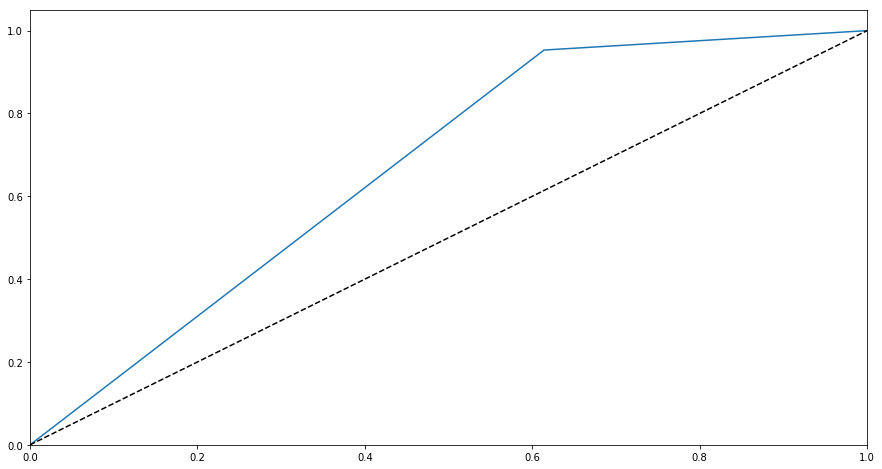

In [235]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve( y_test,y_pred)
auc_score = metrics.roc_auc_score(y_test,y_pred)
auc_score
plt.figure(figsize=(15, 8))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [239]:

y_predicted = log21.predict(df_test1)

In [242]:
# Converting y_pred to a dataframe which is an array
df1 = pd.DataFrame(y_predicted)

df1= df1.rename(columns={ 0 : 'Loan_Status'})
#df1['Loan_Status'] = df1.test_status_Prob.map( lambda x: 1 if x > 0.8 else 0)
df1.head()
#df2 = pd.DataFrame(df1['Loan_Status'])
loan = pd.DataFrame(df_test['Loan_ID'])

In [243]:
# Removing index for both dataframes to append them side by side 
df1.reset_index(drop=True, inplace=True)
loan.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
final = pd.concat([loan,df1],axis=1)
final.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0


In [244]:
final["Loan_Status"] = np.where(final.Loan_Status ==1,"Y","N")
final.to_csv('hypersub.csv', index = False)

In [215]:
## test data

In [216]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [217]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [218]:

df_test['Credit_History'] = df_test['Credit_History'].fillna(method = 'bfill')
df_test['Gender'] = df_test['Gender'].fillna(method = 'bfill')
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(method = 'bfill')
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test['Dependents'] = df_test['Dependents'].fillna(method = 'bfill')
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(method = 'bfill')
#df_train['Gender'] = df_train['Gender'].fillna(method = 'ffill')
#df_train['Married'] = df_train['Married'].fillna(method = 'bfill')


In [219]:
## continous variables:
features1 = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
normalized_df1 = df_test[features1]
normalized_df1 = normalized_df1 - normalized_df1.mean()/normalized_df1.std()

In [220]:
#df_train['Education'] =df_train['Education'].map({'Graduate':1,'Not Graduate':0}) 
df_test['Gender'] = df_test['Gender'].map({'Male': 1,'Female': 0})
df_test['Married'] = df_test['Married'].map({'Yes': 1,'No': 0})
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes': 1,'No': 0})
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',350.0:'29 Years',12.0:'1 Year',6.0:'half Year'})

In [221]:
df_test = df_test.replace({'Dependents':{'0':'dep_None','2':'dep_Two','1':'dep_One','3+':'dep_More_than_three'}})

In [222]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
#gen1 = pd.get_dummies(df_test['Gender'],drop_first = True)
dep1 = pd.get_dummies(df_test['Dependents'],drop_first = True)
#ed1 = pd.get_dummies(df_test['Education'],drop_first = True)
#lat1 = pd.get_dummies(df_test['Loan_Amount_Term'],drop_first = True)
pa1 = pd.get_dummies(df_test['Property_Area'],drop_first = True)
lat1 = pd.get_dummies(df_test['Loan_Amount_Term'],drop_first = True)

df_test = pd.concat([df_test,pa1,lat1,dep1],axis = 1)

In [223]:
df_test1 = df_test.drop(['Loan_ID','Dependents','Loan_Amount_Term','Property_Area','half Year','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)
df_test1 = pd.concat([df_test1,normalized_df1],axis = 1)

In [224]:
df_test1['Education'] =df_test1['Education'].map({'Graduate':1,'Not Graduate':0})

In [245]:
## now selecting only particular features:

In [262]:
from sklearn.feature_selection import RFE

In [281]:
log = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs= 1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
rfe = RFE(log,3)
rfe1 = rfe.fit(X_train,y_train)
print(rfe1.support_)
print(rfe1.ranking_)

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True False False False False False  True False
  True False False False False False False False False False]
[13  7 14 15  1  8 12 10 19  6  1  3  1  5  4  9 20  2 11 18 17 16]


In [282]:
col = X_train.columns[rfe.support_]
X_train1 = X_train[col]

In [283]:
col

Index(['Credit_History', '20 Years', '3 Years'], dtype='object')

In [284]:
X_train1.shape

(429, 3)

In [285]:
col1 = X_test.columns[rfe.support_]
X_test1 = X_test[col1]
X_test1.shape

(185, 3)

In [274]:
log = LogisticRegression()
log.fit(X_train1,y_train)
y_pred1 = log.predict(X_test)

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [287]:
cutoff_df = pd.DataFrame( columns = ['features','accuracy','sensi','speci','false positive rate'])

from sklearn.metrics import confusion_matrix
num = range(1,22,1)
for i in num:
    log = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs= 1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
    rfe = RFE(log,i)
    rfe1 = rfe.fit(X_train,y_train)
    #print(rfe1.support_)
    col = X_train.columns[rfe.support_]
    X_train1 = X_train[col]
    col1 = X_test.columns[rfe.support_]
    X_test1 = X_test[col1]
    X_test1.shape
    log.fit(X_train1, y_train)
    y_pred = log.predict(X_test1)
    cm1 = metrics.confusion_matrix( y_test, y_pred)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    fpr = 1-speci
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,fpr]
print(cutoff_df)

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

    features  accuracy     sensi     speci  false positive rate
1        1.0  0.697297  0.017544  1.000000             0.000000
2        2.0  0.697297  0.017544  1.000000             0.000000
3        3.0  0.783784  0.368421  0.968750             0.031250
4        4.0  0.783784  0.368421  0.968750             0.031250
5        5.0  0.772973  0.368421  0.953125             0.046875
6        6.0  0.772973  0.368421  0.953125             0.046875
7        7.0  0.772973  0.368421  0.953125             0.046875
8        8.0  0.772973  0.368421  0.953125             0.046875
9        9.0  0.783784  0.385965  0.960938             0.039062
10      10.0  0.778378  0.385965  0.953125             0.046875
11      11.0  0.778378  0.385965  0.953125             0.046875
12      12.0  0.783784  0.385965  0.960938             0.039062
13      13.0  0.778378  0.368421  0.960938             0.039062
14      14.0  0.778378  0.368421  0.960938             0.039062
15      15.0  0.783784  0.385965  0.9609

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


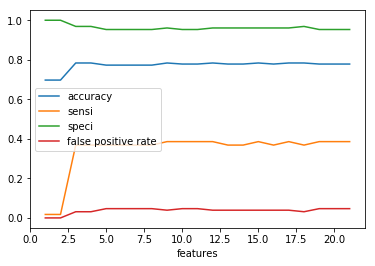

In [288]:
cutoff_df.plot.line(x='features', y=['accuracy','sensi','speci','false positive rate'])

In [290]:
### selecting 4 features and doing final test:

In [292]:
log = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs= 1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
rfe = RFE(log,4)
rfe1 = rfe.fit(X_train,y_train)
print(rfe1.support_)
print(rfe1.ranking_)
col = X_train.columns[rfe.support_]
X_train1 = X_train[col]
col1 = df_test1.columns[rfe.support_]
df_test2 = df_test1[col1]
df_test2.shape
log.fit(X_train1, y_train)
y_pred = log.predict(df_test2)

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True False False False False False  True False
  True False False False False  True False False False False]
[12  6 13 14  1  7 11  9 18  5  1  2  1  4  3  8 19  1 10 17 16 15]


G:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [296]:
# Converting y_pred to a dataframe which is an array
df1 = pd.DataFrame(y_pred)

df1= df1.rename(columns={ 0 : 'Loan_Status'})
#df1['Loan_Status'] = df1.test_status_Prob.map( lambda x: 1 if x > 0.8 else 0)
df1.head()
#df2 = pd.DataFrame(df1['Loan_Status'])
loan = pd.DataFrame(df_test['Loan_ID'])

In [297]:
# Removing index for both dataframes to append them side by side 
df1.reset_index(drop=True, inplace=True)
loan.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
final = pd.concat([loan,df1],axis=1)
final.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [298]:
final["Loan_Status"] = np.where(final.Loan_Status ==1,"Y","N")
final.to_csv('featurehypersub.csv', index = False)

In [300]:
### now searching for threshold probability with hypertuned feature selected model:

In [302]:
y_pred1 = log.predict_proba(X_test1)

In [303]:
y_test_df1 = pd.DataFrame(y_test)
# Converting y_pred to a dataframe which is an array
y_pred_df1 = pd.DataFrame(y_pred1)
# Converting to column dataframe
y_pred_12 = y_pred_df1.iloc[:,[1]]

In [305]:
y_test_df1.head()

,0
0,0
1,1
2,1
3,0
4,0


In [306]:
y_pred_12.head()

,1
0,0.909232
1,0.735811
2,0.909232
3,0.735811
4,0.205758


In [307]:
# Removing index for both dataframes to append them side by side 
y_pred_12.reset_index(drop=True, inplace=True)
y_test_df1.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df1,y_pred_12],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'status_Prob'})
y_pred_final= y_pred_final.rename(columns={ 0 : 'Loan_Status'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Loan_Status','status_Prob'], axis=1)
y_pred_final.head()

,Loan_Status,status_Prob
0,0,0.909232
1,1,0.735811
2,1,0.909232
3,0,0.735811
4,0,0.205758


In [308]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.status_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Loan_Status,status_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.909232,1,1,1,1,1,1,1,1,1,1
1,1,0.735811,1,1,1,1,1,1,1,1,0,0
2,1,0.909232,1,1,1,1,1,1,1,1,1,1
3,0,0.735811,1,1,1,1,1,1,1,1,0,0
4,0,0.205758,1,1,1,0,0,0,0,0,0,0


In [309]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','false positive rate'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Loan_Status, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    fpr = 1-speci
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,fpr]
print(cutoff_df)

     prob  accuracy     sensi     speci  false positive rate
0.0   0.0  0.691892  0.000000  1.000000             0.000000
0.1   0.1  0.745946  0.228070  0.976562             0.023438
0.2   0.2  0.751351  0.245614  0.976562             0.023438
0.3   0.3  0.783784  0.368421  0.968750             0.031250
0.4   0.4  0.783784  0.368421  0.968750             0.031250
0.5   0.5  0.783784  0.368421  0.968750             0.031250
0.6   0.6  0.783784  0.368421  0.968750             0.031250
0.7   0.7  0.783784  0.368421  0.968750             0.031250
0.8   0.8  0.508108  0.771930  0.390625             0.609375
0.9   0.9  0.508108  0.771930  0.390625             0.609375


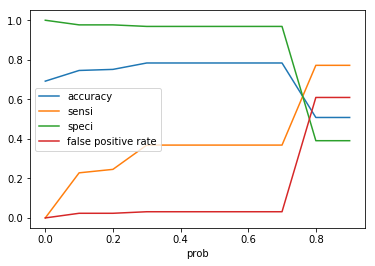

In [310]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','false positive rate'])

In [312]:
y_pred_final['final_predicted'] = y_pred_final.status_Prob.map( lambda x: 1 if x > 0.7 else 0)

(0.0, 1.05)

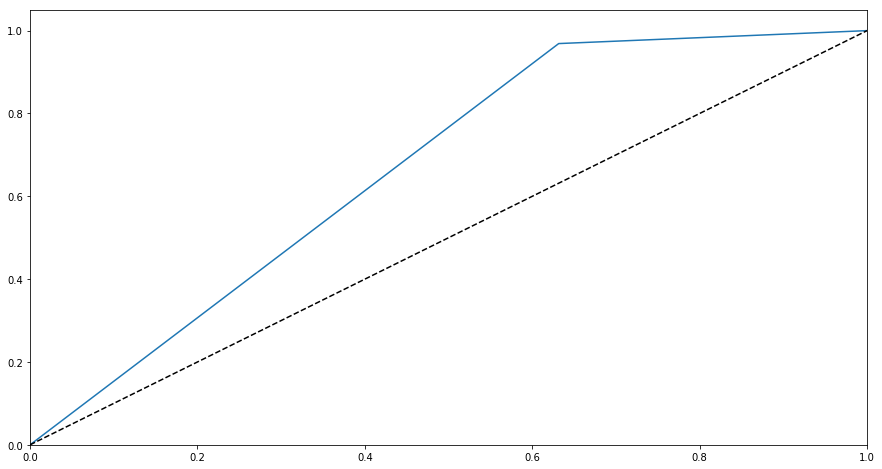

In [313]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Loan_Status, y_pred_final.final_predicted)
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Loan_Status,y_pred_final.final_predicted)
auc_score = metrics.roc_auc_score(y_pred_final.Loan_Status,y_pred_final.final_predicted)
auc_score
plt.figure(figsize=(15, 8))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [314]:
y_predicted = log.predict_proba(df_test2)

In [316]:
# Converting y_pred to a dataframe which is an array
df1 = pd.DataFrame(y_predicted)
# Converting to column dataframe
df1 = df1.iloc[:,[1]]
df1.head()
df1= df1.rename(columns={ 1 : 'test_status_Prob'})
df1['Loan_Status'] = df1.test_status_Prob.map( lambda x: 1 if x > 0.7 else 0)
df2 = pd.DataFrame(df1['Loan_Status'])
loan = pd.DataFrame(df_test['Loan_ID'])

In [317]:
# Removing index for both dataframes to append them side by side 
df2.reset_index(drop=True, inplace=True)
loan.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
final = pd.concat([loan,df2],axis=1)
final.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [318]:
final["Loan_Status"] = np.where(final.Loan_Status ==1,"Y","N")
final.to_csv('probfeaturehypersub1.csv', index = False)